### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE  
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

### Loading Dataset

In [2]:
# read the dataset
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 284807 rows and 31 columns


In [6]:
df['Class'].unique()

array([0, 1], dtype=int64)

Text(0, 0.5, 'frequency')

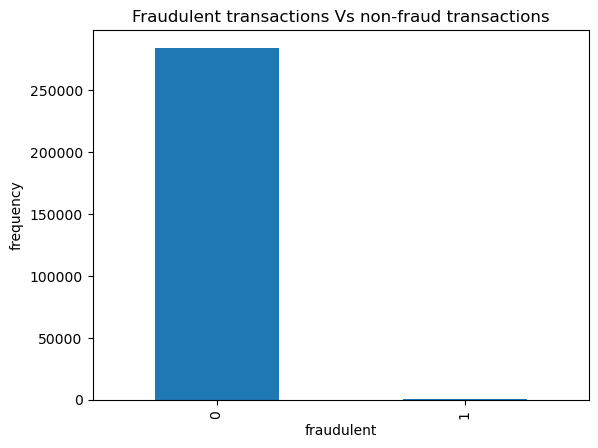

In [7]:
count_classes = pd.value_counts(df['Class'], sort = False)
count_classes.plot(kind='bar')

plt.title ("Fraudulent transactions Vs non-fraud transactions")
plt.xlabel ("fraudulent")
plt.ylabel ("frequency")

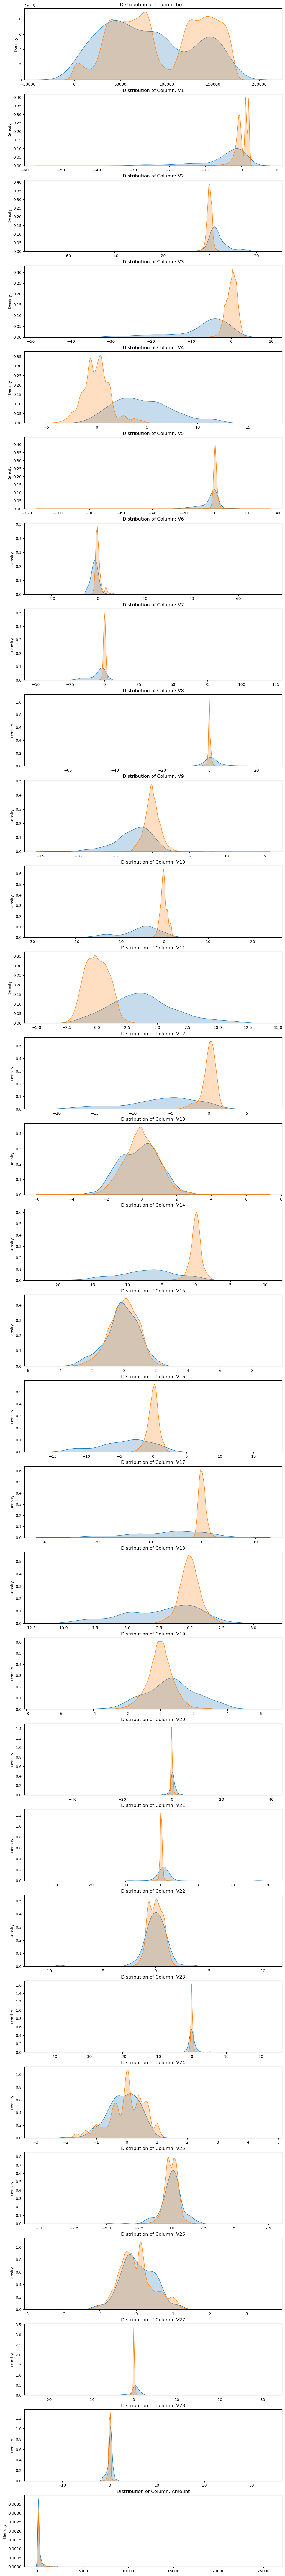

In [8]:
columns = df.iloc[:,0:30].columns

# Plot the distributions of the features
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(df[columns]):
    ax = plt.subplot(grids[grid])
    sns.distplot(df[index][df.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
    sns.distplot(df[index][df.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
    ax.set_xlabel("")
    ax.set_title("Distribution of Column: "  + str(index))
plt.show()

In [9]:
print("Average Amount in a Fraudulent Transaction: " + str(df[df["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(df[df["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 122.21132113821139
Average Amount in a Valid Transaction: 88.29102242231328


In [10]:
# To see how small are the number of Fraud transactions
neg, pos = np.bincount(df['Class'])
total = neg + pos
print(f'Number of positive observations: {pos} ({100*pos / total:.2f}% of total)')

Number of positive observations: 492 (0.17% of total)


In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


### Data preparation

In [12]:
df.isnull().shape[0]
print("Non-missing values: " + str(df.isnull().shape[0]))
print("Missing values: " + str(df.shape[0] - df.isnull().shape[0]))

Non-missing values: 284807
Missing values: 0


In [13]:
scaler = RobustScaler().fit(df[["Time", "Amount"]])
df[["Time", "Amount"]] = scaler.transform(df[["Time", "Amount"]])

# read the first 5 and last 5 rows of the data
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


### Generating training and test splits

In [14]:
y = df["Class"]
X = df.iloc[:,0:30]

# split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [15]:
# Create the cross validation framework 
kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

### Building and training the model

In [16]:
# Fit and predict
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)

In [17]:
# Some metrics for model's performance
print("The accuracy is", accuracy_score(y_test, y_pred)) 
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.9996137776061234
The precision is 0.975
The recall is 0.7959183673469388
The F1 score is 0.8764044943820225


### Building deep learning model

In [18]:
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [19]:
X_resample, y_resample = SMOTE().fit_resample(X, y)
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [22]:
# Create deep learning model
model = Sequential()

model.add(Dense( units = 16, activation = 'relu')) # input layer
model.add(Dense(units = 24, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 24, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid')) # ouptut layer

In [23]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score])

In [24]:
CFG = dict(
    layer1_units = 16,
    layer1_act = 'relu',
    layer1_drop = 0.25,
    layer2_units = 24,
    layer2_act = 'relu',
    layer2_drop = 0.5,
    layer3_units=20,
    layer3_act='relu',
    layer4_units=24,
    layer4_act='relu',
    layer5_units=1,
    layer5_act='sigmoid',
    optimiser = 'Adam',
    batch_size = 128,
    epochs = 20,
)

In [25]:
history = model.fit(X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = CFG['batch_size'],
    epochs = CFG['epochs'],
    verbose = True)

Epoch 1/20
3110/3110 [==============================] - 30s 8ms/step - loss: 0.0729 - accuracy: 0.9709 - f1_score: 0.9717 - val_loss: 0.0222 - val_accuracy: 0.9940 - val_f1_score: 0.9940
Epoch 2/20
3110/3110 [==============================] - 27s 9ms/step - loss: 0.0221 - accuracy: 0.9935 - f1_score: 0.9934 - val_loss: 0.0146 - val_accuracy: 0.9967 - val_f1_score: 0.9967
Epoch 3/20
3110/3110 [==============================] - 19s 6ms/step - loss: 0.0166 - accuracy: 0.9954 - f1_score: 0.9954 - val_loss: 0.0113 - val_accuracy: 0.9971 - val_f1_score: 0.9971
Epoch 4/20
3110/3110 [==============================] - 16s 5ms/step - loss: 0.0139 - accuracy: 0.9962 - f1_score: 0.9962 - val_loss: 0.0100 - val_accuracy: 0.9974 - val_f1_score: 0.9974
Epoch 5/20
3110/3110 [==============================] - 17s 5ms/step - loss: 0.0123 - accuracy: 0.9968 - f1_score: 0.9968 - val_loss: 0.0093 - val_accuracy: 0.9980 - val_f1_score: 0.9980
Epoch 6/20
3110/3110 [==============================] - 16s 5ms/s

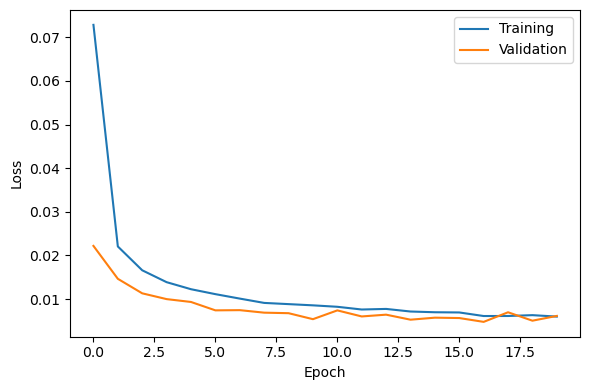

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(6,4))
metric = 'loss'
_ = axs.plot(history.epoch, history.history[f'{metric}'], label='Training')
_ = axs.plot(history.epoch, history.history[f'val_{metric}'], label='Validation')                 
_ = axs.legend()
_ = axs.set_xlabel('Epoch')
_ = axs.set_ylabel('Loss')
fig.tight_layout()

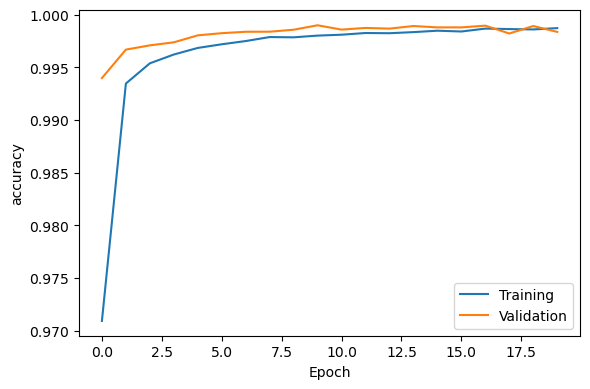

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(6,4))
metric = 'accuracy'
_ = axs.plot(history.epoch, history.history[f'{metric}'], label='Training')
_ = axs.plot(history.epoch, history.history[f'val_{metric}'], label='Validation')                 
_ = axs.legend()
_ = axs.set_xlabel('Epoch')
_ = axs.set_ylabel('accuracy')
fig.tight_layout()

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1933 (7.55 KB)
Trainable params: 1933 (7.5

5331/5331 [==============================] - 15s 3ms/step


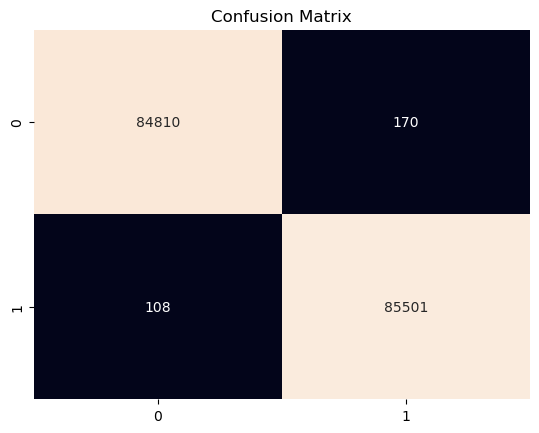

In [29]:
y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred.round())
sns.heatmap(confusion_matrix, annot=True, fmt="d", cbar = False)
plt.title("Confusion Matrix")
plt.show()